<a href="https://colab.research.google.com/github/azhar2ds/Natural-language-processing/blob/master/Fake_Job_Posting_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eduonix Fake job posting prediction Assignment      (NLP)

By Mohammed Azharuddin

In [1]:
%%html
<marquee style='width:30%; color:Red;'>'Eduonix Assignment Project'</marquee>

In [2]:
import numpy as np 
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Checking the versions of libraries
print('Numpy Version-->',np.__version__)
print('Pandas Version-->',pd.__version__)
print('Seaborn Version--> ',sns.__version__)
print('Tensorflow Version-->', tf.__version__)

Numpy Version--> 1.19.5
Pandas Version--> 1.1.5
Seaborn Version-->  0.11.1
Tensorflow Version--> 2.4.1


In [4]:
data = pd.read_csv('/content/fake_job_postings.csv',  error_bad_lines=False)

In [5]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


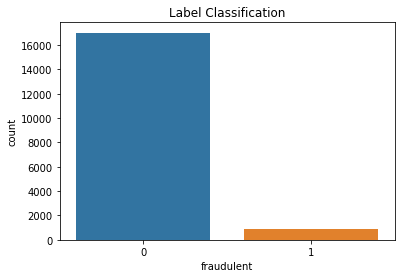

0--> (non-fraudulent) 
1--> (Fraudulent) 


In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data['fraudulent'])
plt.title('Label Classification')
plt.show()
print('0--> (non-fraudulent) \n1--> (Fraudulent) ')

## Balancing the data

In [7]:
rawdata =data.drop(['job_id','title','location','department'],axis =1)
rawdata.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
rawdata  =rawdata.sort_values('fraudulent',ascending = False)
no_of_ones = int(np.sum(rawdata['fraudulent']))
no_of_ones

866

In [9]:
balanceddata = rawdata.head((2*no_of_ones))## data is balanced
balanceddata.shape

(1732, 14)

In [10]:
data_preprocessed = balanceddata.drop(['function','salary_range'],axis =1)
data_preprocessed.head()

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,fraudulent
4577,NaN,Do YOU have the sales skills or entrepreneuria...,NaN,NaN,0,0,0,NaN,NaN,High School or equivalent,NaN,1
7477,NaN,Find more jobs at #URL_4708e598004bb0a85bf09f9...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,1
2078,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes :Degr...,We offer :• Friendly colleagues in an industry...,0,1,0,Full-time,NaN,NaN,Oil & Energy,1
7473,NaN,Apply using below link#URL_ff6a6560a6c8ffc9abc...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,1
7469,NaN,Apply using below link directly#URL_af5a535903...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,1


In [11]:
cat_columns = ['employment_type', 'required_experience', 'required_education']

for col in cat_columns:
    data_preprocessed[col].fillna("Unknown", inplace=True)

In [12]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

data_preprocessed = data_preprocessed.dropna(subset=text_columns, how='all')

for col in text_columns:
    data_preprocessed[col].fillna(' ', inplace=True)

## Shuffling data

In [13]:
data_preprocessed.reset_index(drop= True,inplace = True)

shuffled_indicies = np.arange(data_preprocessed.shape[0])
np.random.shuffle(shuffled_indicies)

shuffled_data = data_preprocessed.iloc[shuffled_indicies]

In [14]:
#Dealing with categorical data

data_w_dummies = pd.get_dummies(shuffled_data, columns=['has_company_logo',
                                                        'employment_type',
                               'has_questions',
                               'employment_type',
                               'required_experience',
                               'required_education',
                               ])
#to get dummies

In [15]:
#Dealing with text data

textdata = ['company_profile','description','requirements','benefits','industry']
#textdata
data_w_dummies['industry']= data_w_dummies['industry'].astype(str)

In [16]:
import re
import string

def clean_text(text):
    text = text.lower()                                              # make the text lowercase
    text = re.sub('\[.*?\]', '', text)                               # remove text in brackets
    text = re.sub('http?://\S+|www\.\S+', '', text)                  # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)                 # remove links
    text = re.sub('<.*?>+', '', text)                                # remove HTML stuff
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # get rid of punctuation
    text = re.sub('\n', '', text)                                    # remove line breaks
    #text = re.sub('\w*\d\w*', '', text)                             # remove anything with numbers, if you want
    #text = re.sub(r'[^\x00-\x7F]+',' ', text)                       # remove unicode
    return text

for c in textdata:
         data_w_dummies[c] = data_w_dummies[c].apply(lambda x: clean_text(x))



data_w_dummies.head()

,company_profile,description,requirements,benefits,telecommuting,industry,fraudulent,has_company_logo_0,has_company_logo_1,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown,has_questions_0,has_questions_1,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Unknown,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unknown,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
431,,corporate overviewaker solutions is a global p...,qualifications amp personal attributes experie...,we offer• friendly colleagues in an industry w...,0,oil energy,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1307,we help teachers get safe amp secure jobs abroad,play with kids get paid for it love travel job...,university degree required tefl tesol celta ...,see job description,0,education management,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51,aker solutions is a global provider of product...,corporate overviewaker solutions is a global p...,qualifications amp personal attributesbsc degr...,,0,oil energy,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
700,,we are a fullservice marketing and staffing fi...,requirementsall you need is access to the inte...,this is an entry level position and we offer f...,0,nan,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1324,hawkeye recruitment provides cost effective re...,purpose of job the grants manager plans and ...,top competencies requiredindividual must posse...,,0,nonprofit organization management,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#Inputs and Targets

In [18]:
list(data_w_dummies.columns)

['company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'industry',
 'fraudulent',
 'has_company_logo_0',
 'has_company_logo_1',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_Unknown',
 'has_questions_0',
 'has_questions_1',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_Unknown',
 'required_experience_Associate',
 'required_experience_Director',
 'required_experience_Entry level',
 'required_experience_Executive',
 'required_experience_Internship',
 'required_experience_Mid-Senior level',
 'required_experience_Not Applicable',
 'required_experience_Unknown',
 'required_education_Associate Degree',
 "required_education_Bachelor's Degree",
 'required_education_Certification',
 'required_education_Doctorate',
 'required_education_

In [19]:
inputs = data_w_dummies[['company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'industry',
  'has_company_logo_0',
 'has_company_logo_1',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_Unknown',
 'has_questions_0',
 'has_questions_1',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Other',
 'employment_type_Part-time',
 'employment_type_Temporary',
 'employment_type_Unknown',
 'required_experience_Associate',
 'required_experience_Director',
 'required_experience_Entry level',
 'required_experience_Executive',
 'required_experience_Internship',
 'required_experience_Mid-Senior level',
 'required_experience_Not Applicable',
 'required_experience_Unknown',
 'required_education_Associate Degree',
 "required_education_Bachelor's Degree",
 'required_education_Certification',
 'required_education_Doctorate',
 'required_education_High School or equivalent',
 "required_education_Master's Degree",
 'required_education_Professional',
 'required_education_Some College Coursework Completed',
 'required_education_Some High School Coursework',
 'required_education_Unknown',
 'required_education_Unspecified',
 'required_education_Vocational',
 'required_education_Vocational - Degree',
 'required_education_Vocational - HS Diploma']]

target = data_w_dummies['fraudulent']

In [20]:
target.head()

431     1
1307    0
51      1
700     1
1324    0
Name: fraudulent, dtype: int64

### Tokenize and vectorization

In [21]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

def remove_stopwords(text):
    words = [w for w in text if w not in stop_words]
    return words

def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

for c in textdata:
        inputs[c] = inputs[c].apply(lambda x: tokenizer.tokenize(x))
        inputs[c] = inputs[c].apply(lambda x : remove_stopwords(x))
        inputs[c] = inputs[c].apply(lambda x : combine_text(x))
inputs.head()

,company_profile,description,requirements,benefits,telecommuting,industry,has_company_logo_0,has_company_logo_1,employment_type_Contract,employment_type_Contract,employment_type_Full-time,employment_type_Full-time,employment_type_Other,employment_type_Other,employment_type_Part-time,employment_type_Part-time,employment_type_Temporary,employment_type_Temporary,employment_type_Unknown,employment_type_Unknown,has_questions_0,has_questions_1,employment_type_Contract,employment_type_Contract,employment_type_Full-time,employment_type_Full-time,employment_type_Other,employment_type_Other,employment_type_Part-time,employment_type_Part-time,employment_type_Temporary,employment_type_Temporary,employment_type_Unknown,employment_type_Unknown,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Unknown,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unknown,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
431,,corporate overviewaker solutions global provid...,qualifications amp personal attributes experie...,offer friendly colleagues industry bright futu...,0,oil energy,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1307,help teachers get safe amp secure jobs abroad,play kids get paid love travel jobs asia1500 u...,university degree required tefl tesol celta te...,see job description,0,education management,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51,aker solutions global provider products system...,corporate overviewaker solutions global provid...,qualifications amp personal attributesbsc degr...,,0,oil energy,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
700,,fullservice marketing staffing firm serving co...,requirementsall need access internet participa...,entry level position offer full online trainin...,0,nan,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1324,hawkeye recruitment provides cost effective re...,purpose job grants manager plans implements lo...,top competencies requiredindividual must posse...,,0,nonprofit organization management,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
textinputs = inputs[textdata]
nontextinputs = inputs.drop(textdata,axis = 1)
nontextinputs.head()

,telecommuting,has_company_logo_0,has_company_logo_1,employment_type_Contract,employment_type_Contract,employment_type_Full-time,employment_type_Full-time,employment_type_Other,employment_type_Other,employment_type_Part-time,employment_type_Part-time,employment_type_Temporary,employment_type_Temporary,employment_type_Unknown,employment_type_Unknown,has_questions_0,has_questions_1,employment_type_Contract,employment_type_Contract,employment_type_Full-time,employment_type_Full-time,employment_type_Other,employment_type_Other,employment_type_Part-time,employment_type_Part-time,employment_type_Temporary,employment_type_Temporary,employment_type_Unknown,employment_type_Unknown,required_experience_Associate,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Unknown,required_education_Associate Degree,required_education_Bachelor's Degree,required_education_Certification,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unknown,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
431,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1307,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
700,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1324,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
#Vectorization
textcombined = textinputs['company_profile'] + " " + textinputs['description']+ " " + textinputs['requirements'] + " " + textinputs['benefits'] + " " +textinputs['industry']
#textcombined.head()

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

vectorinputs = []
#for c in textdata:
vectorinputs = count_vectorizer.fit_transform(textcombined)
#vectorinputs = vectorinputs.todense()
#vectorinputs = vectorinputs.transpose()
#vectorinputs = np.array(list(x for x in vectorinputs))
vectorinputs

<1731x32885 sparse matrix of type '<class 'numpy.int64'>'
	with 275908 stored elements in Compressed Sparse Row format>

In [25]:
df = pd.DataFrame(vectorinputs.todense())
newinputs = pd.concat([df,nontextinputs],axis=1, sort=False)

Training and Testing Set

In [26]:
# Count the total number of samples
samples_count = newinputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = newinputs[:train_samples_count]
train_targets = target[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = newinputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = target[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = newinputs[train_samples_count+validation_samples_count:]
test_targets = target[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

698 1384 0.5043352601156069
85 173 0.4913294797687861
82 174 0.47126436781609193


### Model

In [27]:
import tensorflow as tf
from scipy.sparse import dok_matrix
# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that

In [28]:
train_inputs = train_inputs.astype(np.float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = train_targets.astype(np.int)

# we load the validation data in the temporary variable
#npz = np.load('Audiobooks_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = validation_inputs.astype(np.float), validation_targets.astype(np.int)

# we load the test data in the temporary variable
#npz = np.load('Audiobooks_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = test_inputs.astype(np.float), test_targets.astype(np.int)

In [29]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, input_dim=(newinputs.shape[1]), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())



model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3293700   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2

In [30]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
history = model.fit(train_inputs, y=train_targets, batch_size=64, 
          epochs=50,callbacks=[early_stopping], verbose=1, 
          validation_data=(validation_inputs, validation_targets))

Epoch 1/50
22/22 [==============================] - 2s 49ms/step - loss: 0.5998 - accuracy: 0.6624 - val_loss: 0.5516 - val_accuracy: 0.8960
Epoch 2/50
22/22 [==============================] - 0s 15ms/step - loss: 0.2652 - accuracy: 0.9180 - val_loss: 0.4132 - val_accuracy: 0.9249
Epoch 3/50
22/22 [==============================] - 0s 15ms/step - loss: 0.1360 - accuracy: 0.9725 - val_loss: 0.3063 - val_accuracy: 0.9364
Epoch 4/50
22/22 [==============================] - 0s 16ms/step - loss: 0.0798 - accuracy: 0.9856 - val_loss: 0.2418 - val_accuracy: 0.9422
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 0.0493 - accuracy: 0.9909 - val_loss: 0.2013 - val_accuracy: 0.9480
Epoch 6/50
22/22 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.9962 - val_loss: 0.1809 - val_accuracy: 0.9422
Epoch 7/50
22/22 [==============================] - 0s 14ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.1772 - val_accuracy: 0.9422
Epoch 8/50
22

**Final Accuracy plots**

44/44 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Training Loss Function: 0.0
Accuracy of Training: 100.0
6/6 [==============================] - 0s 6ms/step - loss: 0.2369 - accuracy: 0.9306
Testing Loss Function: 24.0
Accuracy of Testing: 93.0


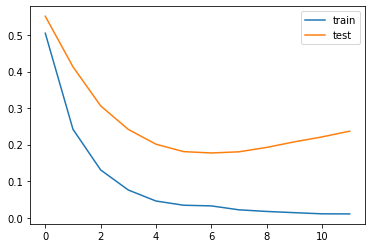

In [31]:
training=model.evaluate(train_inputs, train_targets)
print('Training Loss Function:',round(training[0],2)*100)
print('Accuracy of Training:',round(training[1], 2)*100)

testing=model.evaluate(validation_inputs, validation_targets)
print('Testing Loss Function:',round(testing[0],2)*100)
print('Accuracy of Testing:',round(testing[1], 2)*100)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()